# Import


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
import glob
import random
import cv2 as cv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread
from sklearn.metrics import confusion_matrix
from skimage.transform import resize
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.color import rgb2gray

# Data Mapping


In [6]:
from skimage.feature import hog

input_dir = '/content/drive/MyDrive/Colab Notebooks/مباحث ویژه پیرگزی/Data'
categories = ['111', '206', '207', '405', 'Samand', 'Tiba','Nissan']
data = []
labels = []
acc_score = []

# Define HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        img = imread(img_path)
        img = rgb2gray(img)
        img = resize(img, (60, 60))

        # Extract HOG features
        hog_features = hog(img, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block)

        data.append(hog_features)
        labels.append(category_idx)

data = np.asarray(data)
labels = np.asarray(labels)


In [7]:
print("Data length:", len(data))
print("Labels length:", len(labels))


Data length: 999
Labels length: 999


# Split the data into training and testing sets


In [8]:
x_train, x_test, y_train, y_test = train_test_split(data,labels,test_size=0.2,shuffle=True,stratify=labels)

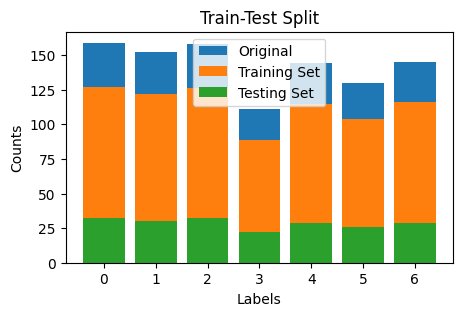

In [9]:
unique_labels, label_counts = np.unique(labels, return_counts=True)
train_labels, train_label_counts = np.unique(y_train, return_counts=True)
test_labels, test_label_counts = np.unique(y_test, return_counts=True)
plt.figure(figsize=(5, 3))
plt.bar(unique_labels, label_counts, label='Original')
plt.bar(train_labels, train_label_counts, label='Training Set')
plt.bar(test_labels, test_label_counts, label='Testing Set')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Train-Test Split')
plt.legend()
plt.show()

# SVC Classifier


In [10]:
# Create an instance of the SVC classifier
classifier = SVC()

# Define the parameters to be searched using grid search
parameters = [{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}]

# Create a GridSearchCV object with the classifier and parameters
grid_search = GridSearchCV(classifier, parameters)

# Perform grid search to find the best combination of parameters
grid_search.fit(x_train, y_train)

# Retrieve the best estimator from the grid search
best_estim = grid_search.best_estimator_

# Make predictions on the test data using the best estimator
y_pred = best_estim.predict(x_test)

# Calculate the accuracy of the predictions compared to the true labels
score = accuracy_score(y_pred, y_test)
acc_score.append(score * 100)
print('ACC: ' + str(score * 100))


ACC: 32.0


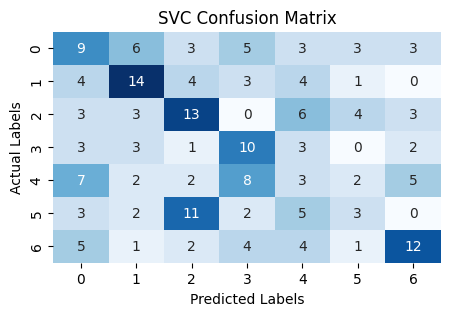

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

0 -> 111 |
1 -> 206 |
2 -> 207 |
3 -> 405 |
4 -> Samand |
5 -> Tiba |


# Random Forest Classifier


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Create three instances of RandomForestClassifier with different numbers of estimators
base_classifier1 = RandomForestClassifier(n_estimators=100)
base_classifier2 = RandomForestClassifier(n_estimators=200)
base_classifier3 = RandomForestClassifier(n_estimators=300)

# Train each classifier on the training data
base_classifier1.fit(x_train, y_train)
base_classifier2.fit(x_train, y_train)
base_classifier3.fit(x_train, y_train)

# Make predictions using each classifier on the test data
predictions1 = base_classifier1.predict(x_test)
predictions2 = base_classifier2.predict(x_test)
predictions3 = base_classifier3.predict(x_test)

# Combine the predictions from the three classifiers using a simple averaging ensemble
ensemble_predictions = (predictions1 + predictions2 + predictions3) // 3

# Calculate the accuracy of the ensemble predictions compared to the true labels
accuracy = accuracy_score(y_test, ensemble_predictions)
acc_score.append(accuracy*100)
print('ACC: ' + str(accuracy * 100))



ACC: 24.5


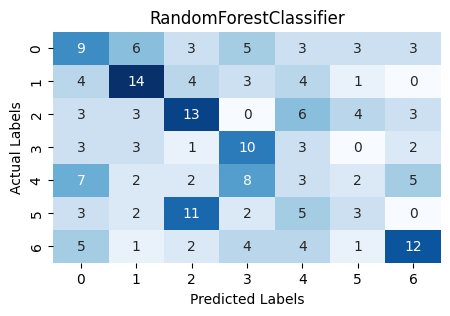

In [13]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('RandomForestClassifier')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

# Decision Tree Classifier


In [14]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier()

# Train the classifier
tree_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = tree_classifier.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
acc_score.append(accuracy*100)
print('ACC: ' + str(accuracy * 100))


ACC: 19.5


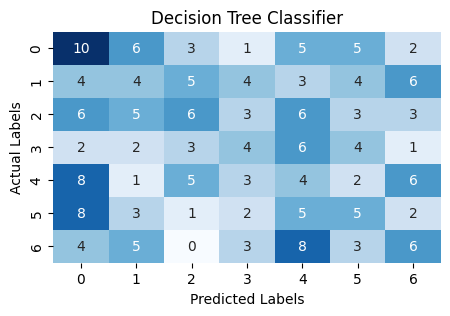

In [15]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

# KNeighborsClassifier


In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
acc_score.append(accuracy*100)
print('ACC: ' + str(accuracy * 100))


ACC: 35.0


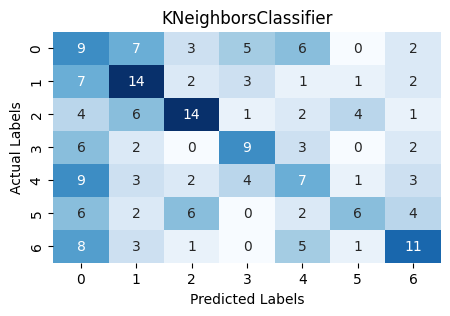

In [17]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNeighborsClassifier')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

# MLP Classifier


In [18]:
from sklearn.neural_network import MLPClassifier

# Create an instance of the MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

# Train the classifier
mlp_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = mlp_classifier.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
acc_score.append(accuracy*100)
print('ACC: ' + str(accuracy * 100))


ACC: 33.5


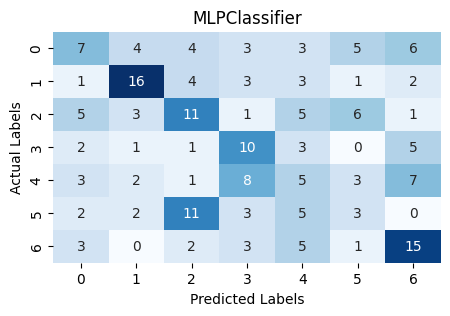

In [19]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('MLPClassifier')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

# Compering


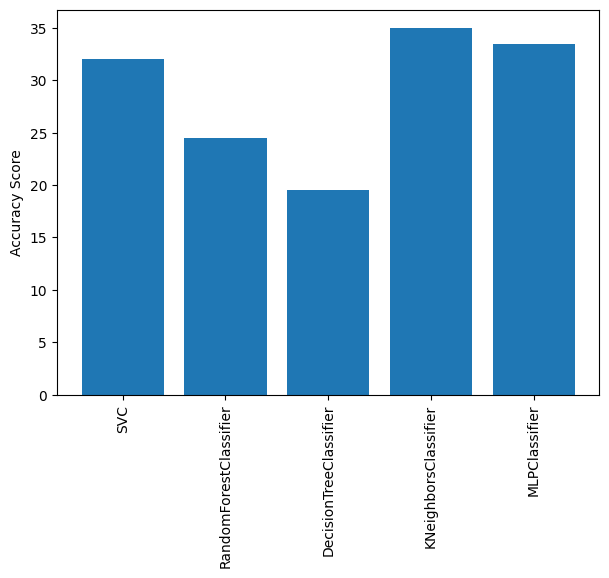

In [20]:
classifiers = ['SVC', 'RandomForestClassifier', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'MLPClassifier']

# Plotting the bar chart
plt.figure(figsize=(7, 5))
plt.bar(classifiers, acc_score)
plt.xticks(rotation=90)
plt.ylabel('Accuracy Score')
# plt.title('Accuracy Scores for Hyperparameter Combinations')
plt.show()

# Reyhane

In [22]:
import cv2
import numpy as np
from skimage.feature import hog
# Assuming you have already trained your KNN classifier and loaded it as 'knn_classifier'
# Assuming you have also defined 'orientations', 'pixels_per_cell', and 'cells_per_block'

def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path)
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Resize the image to the same size used during training (e.g., 60x60)
    resized_img = cv2.resize(gray_img, (60, 60))
    return resized_img

def extract_hog_features(image):
    # Extract HOG features
    hog_features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block)
    return hog_features

def test_with_one_image(image_path):
    # Preprocess the image
    test_image = preprocess_image(image_path)
    # Extract HOG features from the preprocessed image
    hog_features = extract_hog_features(test_image)
    # Reshape the feature array to have a single sample
    test_image_features = hog_features.reshape(1, -1)
    # Make predictions using the trained KNN classifier
    test_prediction = knn_classifier.predict(test_image_features)
    return test_prediction[0]

# Replace 'path_to_your_image.jpg' with the actual path to the image you want to test
image_path_to_test = '/content/drive/MyDrive/Colab Notebooks/مباحث ویژه پیرگزی/Data/111/i (1).jpg'
predicted_category = test_with_one_image(image_path_to_test)

# print("Predicted category: ", predicted_category)
if (predicted_category == 0):
  print('Predicted category: 111')
elif(predicted_category == 1):
  print('Predicted category: 206')
elif(predicted_category == 2):
  print('Predicted category: 207')
elif(predicted_category == 3):
  print('Predicted category: 405')
elif(predicted_category == 4):
  print('Predicted category: Nissan')
elif(predicted_category == 5):
  print('Predicted category: Samand')
elif(predicted_category == 6):
  print('Predicted category: Tiba')


Predicted category: 111
